<a href="https://colab.research.google.com/github/YashwanthV1232003/Plant-disease/blob/main/densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashv2003
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:23<00:00, 121MB/s]


In [6]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')


Training Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
There are 0 directories,2008 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy
There are 0 directories,1961 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directories,1702 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot
There are 0 directories,1728 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___healthy
There are 0 directories,1781 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augm

In [7]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')


Testing Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,502 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy
There are 0 directories,490 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directories,425 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot
There are 0 directories,432 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___healthy
There are 0 directories,445 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)

In [8]:


from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [9]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [10]:


class_names = train_data.class_names
class_names



['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

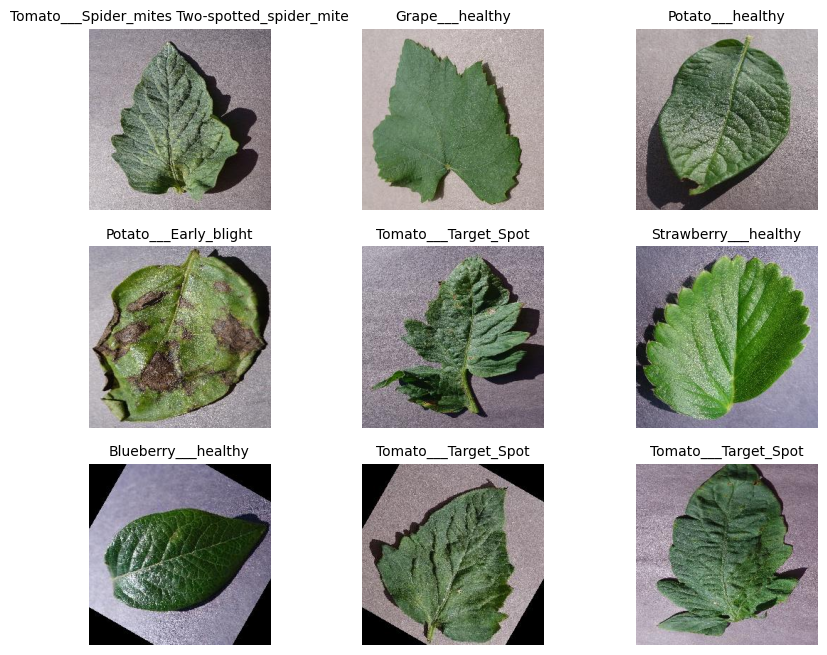

In [12]:

plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224, 224, 3)

# Using DenseNet instead of EfficientNet
base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet')
base_model.trainable = False

inputs = layers.Input(shape=image_shape, name='input_layer')

x = base_model(inputs, training=False)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38, activation='softmax', name='output_layer')(x)

# Create the model
feature_model = tf.keras.Model(inputs, outputs, name='plant_disease_model_dense')


29084464/29084464 [==============================] - 1s 0us/step


In [14]:
base_model.trainable = True

# Choose the number of layers you want to freeze from the end
num_layers_to_freeze = 20

for layer in base_model.layers[:-num_layers_to_freeze]:
    layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])


In [15]:

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']

In [16]:
feature_model.summary()

Model: "plant_disease_model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024   7037504   
                             )                                   
                                                                 
 GlobalAveragePooling2D_lay  (None, 1024)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 38)                38950     
                                                                 
Total params: 7076454 (26.99 MB)
Trainable params: 406118 (1.55 MB)
Non-trainable params: 6670336 (25.45 MB

In [17]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")


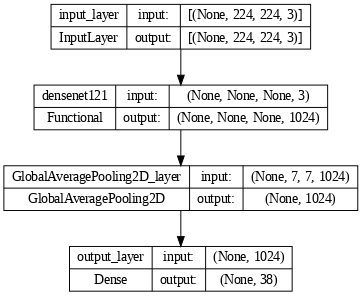

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(feature_model,
           show_shapes=True,
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=70)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.951727 to fit



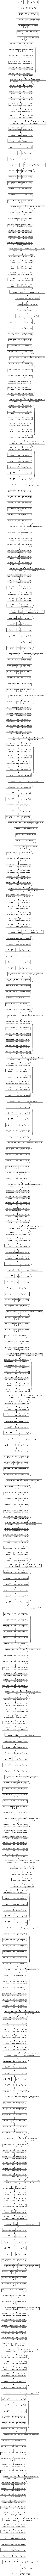

In [20]:
plot_model(base_model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [21]:
initial_epochs = 100

history1 = feature_model.fit(train_data, epochs=initial_epochs,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data),
                             callbacks=[early_stopping,
                                        model_checkpoint,
                                        reduce_lr,
                                        create_tensorboard_callback('plant_disease_model',
                                                                    'DenseNet121')])


Saving TensorBoard log files to: plant_disease_model/DenseNet121/20240107-090130
Epoch 1/100
2197/2197 [==============================] - 292s 126ms/step - loss: 0.6510 - accuracy: 0.8159 - val_loss: 0.3002 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 2/100
2197/2197 [==============================] - 273s 124ms/step - loss: 0.2530 - accuracy: 0.9253 - val_loss: 0.2418 - val_accuracy: 0.9292 - lr: 0.0010
Epoch 3/100
2197/2197 [==============================] - 269s 122ms/step - loss: 0.1854 - accuracy: 0.9452 - val_loss: 0.2675 - val_accuracy: 0.9284 - lr: 0.0010
Epoch 4/100
2197/2197 [==============================] - 275s 125ms/step - loss: 0.1483 - accuracy: 0.9568 - val_loss: 0.2029 - val_accuracy: 0.9454 - lr: 0.0010
Epoch 5/100
2197/2197 [==============================] - 271s 123ms/step - loss: 0.1234 - accuracy: 0.9640 - val_loss: 0.2779 - val_accuracy: 0.9357 - lr: 0.0010
Epoch 6/100
2197/2197 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9706
Epoch 6: R

In [22]:

feature_model.load_weights(checkpoint_path)

In [27]:
feature_model.evaluate(test_data)


550/550 [==============================] - 53s 96ms/step - loss: 0.0931 - accuracy: 0.9765


[0.0930934026837349, 0.976496696472168]

In [25]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')

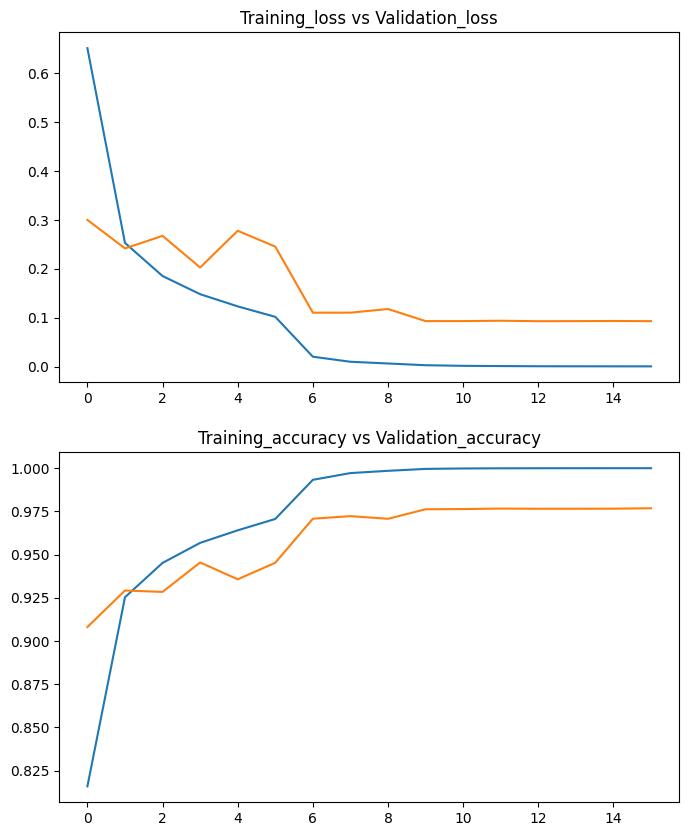

In [26]:
plot_history(history1)

In [28]:
feature_model.save('best_plant_model_resnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img


Text(0.5, 0.98, '(224, 224, 3)')

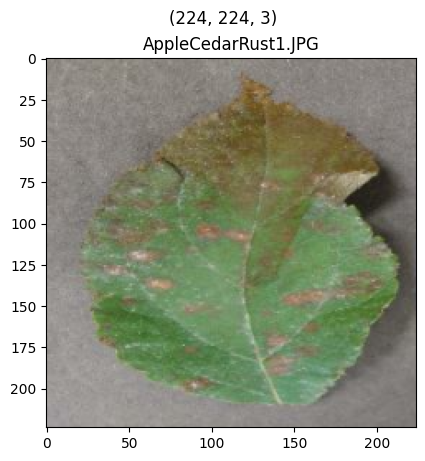

In [30]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust4.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)


In [31]:

pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred

1/1 [==============================] - 4s 4s/step


array([[2.3210326e-19, 4.8812713e-14, 9.9999988e-01, 2.3483748e-26,
        0.0000000e+00, 7.8322934e-20, 4.2856775e-33, 8.4900922e-09,
        4.2973708e-16, 6.6957048e-15, 6.1185627e-33, 1.8814286e-13,
        6.0879707e-14, 4.7686535e-17, 5.3928475e-23, 3.9301191e-18,
        3.1287824e-15, 4.9526953e-33, 3.7981477e-17, 2.4126461e-33,
        1.3141496e-22, 2.7048753e-23, 7.6530052e-31, 5.3469285e-28,
        4.7784759e-29, 2.0981804e-21, 2.6300263e-25, 1.8496406e-35,
        6.3543027e-08, 8.8691363e-14, 1.5298044e-12, 3.0621012e-17,
        3.7027549e-17, 2.0979055e-31, 2.8098313e-27, 2.8689083e-16,
        0.0000000e+00, 3.8243421e-19]], dtype=float32)

In [32]:
predicted_value = class_names[pred.argmax()]
predicted_value


'Apple___Cedar_apple_rust'

In [33]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 29ms/step


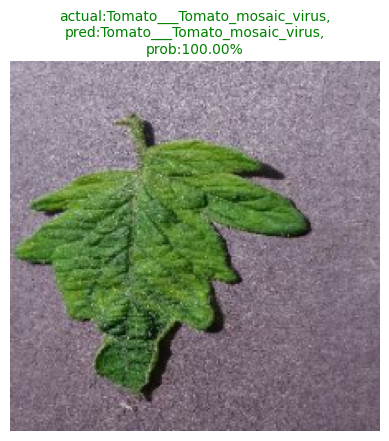

In [34]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 27ms/step


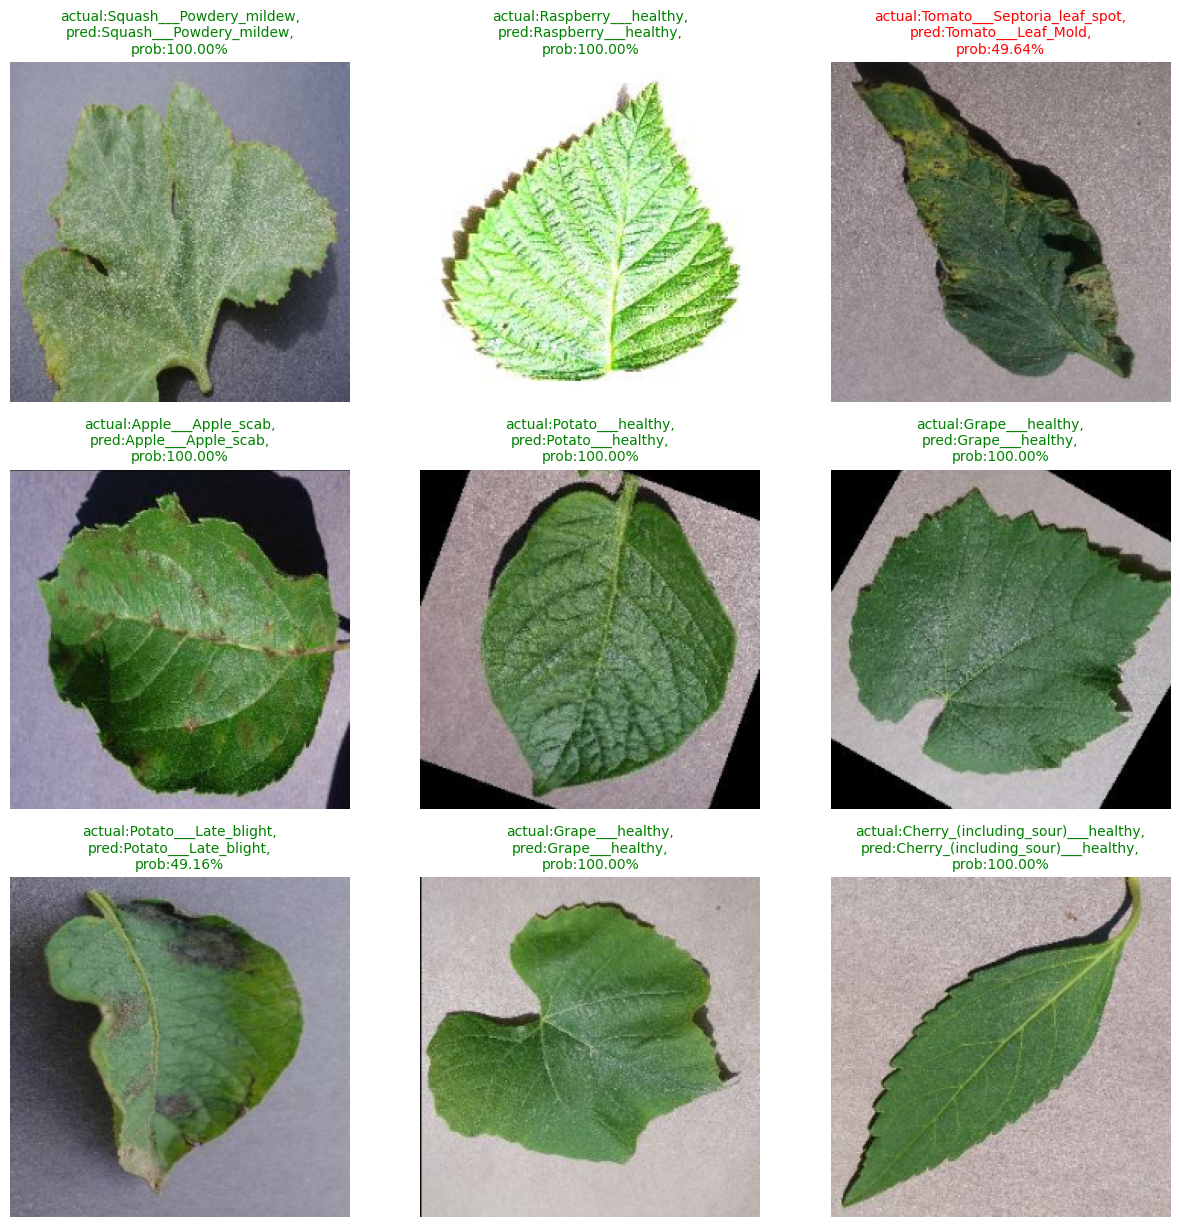

In [35]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 37ms/step


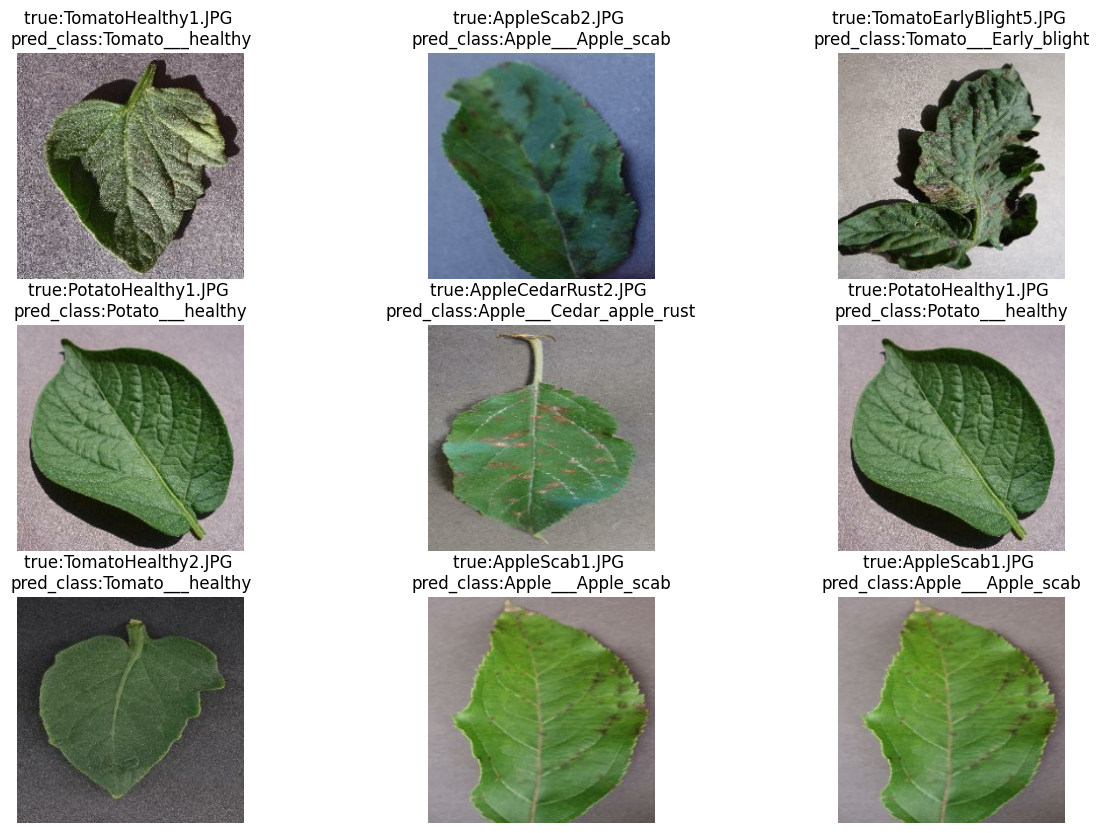

In [36]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)


lets download some image on google


In [37]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [48]:
!wget https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

--2024-01-07 10:33:12--  https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg
Resolving content.peat-cloud.com (content.peat-cloud.com)... 13.225.142.41, 13.225.142.90, 13.225.142.51, ...
Connecting to content.peat-cloud.com (content.peat-cloud.com)|13.225.142.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20361 (20K) [image/jpeg]
Saving to: ‘black-rot-of-grape-grape-1575457334.jpg.1’

black-rot-of-grape- 100%[===================>]  19.88K  --.-KB/s    in 0s      

2024-01-07 10:33:12 (256 MB/s) - ‘black-rot-of-grape-grape-1575457334.jpg.1’ saved [20361/20361]



1/1 [==============================] - 0s 28ms/step


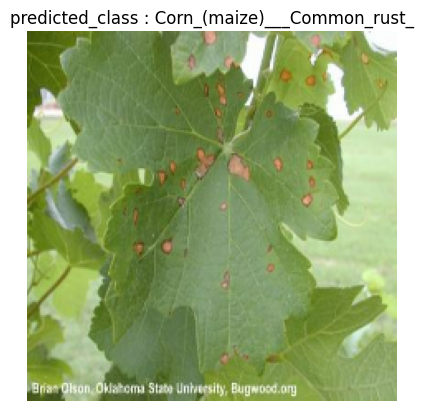

In [50]:
predict_img('black-rot-of-grape-grape-1575457334.jpg')

In [51]:
!wget https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

--2024-01-07 10:33:26--  https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28221 (28K) [image/jpeg]
Saving to: ‘Depositphotos_160089900_l-2015_large.jpg’

Depositphotos_16008 100%[===================>]  27.56K  --.-KB/s    in 0s      

2024-01-07 10:33:26 (162 MB/s) - ‘Depositphotos_160089900_l-2015_large.jpg’ saved [28221/28221]



1/1 [==============================] - 0s 40ms/step


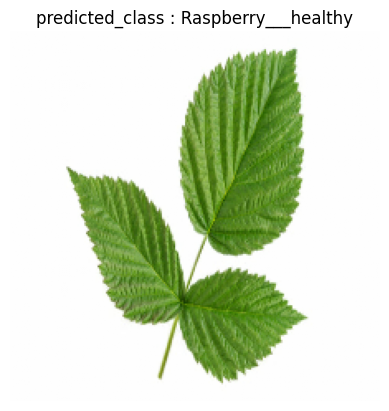

In [52]:
predict_img('Depositphotos_160089900_l-2015_large.jpg')